# Session 16
## Gradient Descent

## Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
X, y = make_regression(n_samples=200, n_features=3, random_state=0)
print(X.shape, y.shape)

(200, 3) (200,)


In [4]:
y = y.reshape(-1,1)
print(y.shape)

(200, 1)


In [40]:
class LinearRegression:

    def __get_gradient(self, X, y):
        gradient = []
        for  i in range(X.shape[1]):
            grad = -2*( ( (y - self.predict(X))* (X[:,i].reshape(-1,1)) ).sum() ) 
            gradient.append(grad)
        return np.array(gradient).reshape(-1,1)

    def __gradient_descent(self, X, y, learning_rate, epochs, batch_size):

        # start with any random weights
        self.w = np.random.randn(X.shape[1]).reshape(-1,1)
        # self.w = np.zeros((X.shape[1], 1)) 

        idx = np.arange(0,X.shape[0])

        losses = []

        for i in range(epochs):
            random_idx = np.random.choice(idx, size = batch_size)

            # update rule
            self.w = self.w - learning_rate*self.__get_gradient(X[random_idx], y[random_idx])

            ypred = self.predict(X)
            loss = self.loss(y, ypred)
            r2_score = self.r_squared(y, ypred)
            losses.append(loss)
            print(f"epoch: {i}, loss: {loss}, r2: {r2_score}") 

        return losses


    def fit(self, X, y, method="batch", learning_rate=0.001, epochs=300, **kwargs):
        """ Training the model"""
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)

        if method == "batch":
            batch_size = X.shape[0] # all the samples

        elif method == "mini-batch":
            if kwargs.get('batch_size') == None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']

        elif method == 'stochastic':
            batch_size = 1

        return self.__gradient_descent(X, y, learning_rate, epochs, batch_size)
        
        

    def predict(self, X):
        return X.dot(self.w)

    def loss(self, y, ypred):
        return ((y - ypred)**2).sum()

    def r_squared(self, ytrue, ypred):
        e_method = ((ytrue-ypred)**2).sum() # sum of squares of residuals
        e_baseline = ((ytrue-ytrue.mean())**2).sum() # total sum of squares
        return 1 - e_method/e_baseline

In [41]:
lr = LinearRegression()

In [55]:
losses = lr.fit(X, y, method='batch', learning_rate=0.001, epochs = 50)
print(lr.w)

epoch: 0, loss: 533550.8628847201, r2: 0.6541361499806398
epoch: 1, loss: 170207.35574421624, r2: 0.8896664302236754
epoch: 2, loss: 53516.38621759707, r2: 0.9653090554923527
epoch: 3, loss: 19644.080437727265, r2: 0.9872661113252659
epoch: 4, loss: 6129.664400828627, r2: 0.9960265656444918
epoch: 5, loss: 1249.3729919752159, r2: 0.9991901185375683
epoch: 6, loss: 453.0657487089428, r2: 0.9997063090418162
epoch: 7, loss: 186.8719035664786, r2: 0.9998788639649488
epoch: 8, loss: 64.52279152027772, r2: 0.9999581743697901
epoch: 9, loss: 25.30075733854643, r2: 0.9999835992818112
epoch: 10, loss: 10.84207426591222, r2: 0.9999929718386593
epoch: 11, loss: 5.180794333118415, r2: 0.9999966416519982
epoch: 12, loss: 2.229730113493754, r2: 0.9999985546213207
epoch: 13, loss: 0.924766127146988, r2: 0.9999994005385515
epoch: 14, loss: 0.47160712794067866, r2: 0.9999996942899575
epoch: 15, loss: 0.2673281384876991, r2: 0.9999998267097935
epoch: 16, loss: 0.1381772217979807, r2: 0.9999999104293344


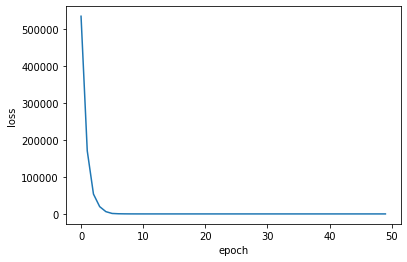

In [56]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [57]:
b = 2*np.ones((4,))
np.ones((4,1)) * b

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])